# Evolution of Sample Average For Laplace And Cauchy Distribution

## Generate Random Numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import typing

plt.style.use("../custom.matplotlibrc")

DISTRIBUTION: typing.Literal["laplace", "cauchy"] = "cauchy" 

MEAN = 0
B = 1


def laplace(x, mean=0, b=1):
    return 1 / (2 * b) * np.exp(-np.abs(x - mean) / b)


def cauchy(x, loc=0, scale=1):
    return 1 / ((scale * np.pi) * (1 + ((x - loc) / scale) ** 2))


X = 1_000
T = pow(2, 11)

hist_range = None
distribution_hist_name = None
average_value_evolution = None
average_hist_evolution = None
average_uncertainty_evolution = None
histogram_evolution_range = None

if DISTRIBUTION == "laplace":
    hist_range = (-6, 6)
    random_numbers = np.random.laplace(loc=MEAN, scale=B, size=(X, T))
    x = np.linspace(*hist_range, 200)
    pdf = laplace(x, MEAN, B)
    distribution_hist_name = r"laplace_hist_first_experiment.pdf"
    average_value_evolution = r"laplace_average_value_evolution.pdf"
    average_hist_evolution = r"laplace_average_hist_evolution.pdf"
    average_uncertainty_evolution = r"laplace_average_uncertainty_evolution.pdf"
elif DISTRIBUTION == "cauchy":
    hist_range = (-10, 10)
    histogram_evolution_range = (-15, 15)
    random_numbers = np.random.standard_cauchy(size=(X, T))
    x = np.linspace(*hist_range, 220)
    pdf = cauchy(x)
    distribution_hist_name = r"cauchy_hist_first_experiment.pdf"
    average_value_evolution = r"cauchy_average_value_evolution.pdf"
    average_hist_evolution = r"cauchy_average_hist_evolution.pdf"
    average_uncertainty_evolution = r"cauchy_average_uncertainty_evolution.pdf"
else:
   raise NotImplementedError("Distribution not implemented") 

## Make a Histogram for first Experiment

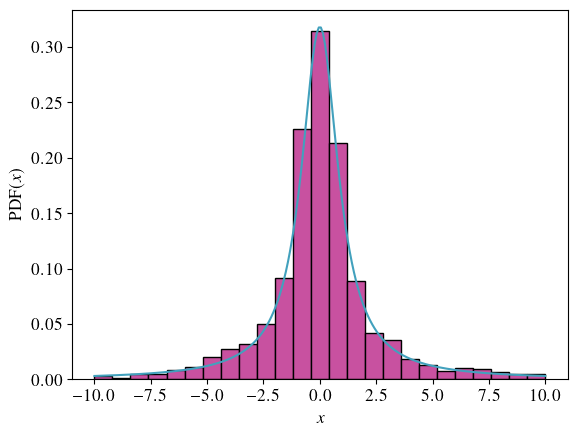

In [2]:
plt.hist(random_numbers[0], bins=25, density=True, range=hist_range)
plt.plot(x, pdf)
plt.xlabel("$x$")
plt.ylabel("PDF$(x)$")
plt.savefig(distribution_hist_name)


## Plot the Average over time

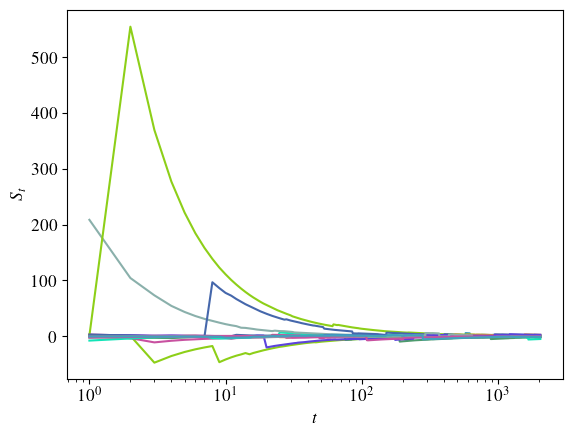

In [3]:
n = np.arange(1, random_numbers[0].__len__() + 1, 1)
for i in range(20):
    time_evolution_average = random_numbers[i].cumsum() / n

    plt.xscale("log")
    plt.plot(n, time_evolution_average)
plt.xlabel("$t$")
plt.ylabel("$S_t$")
plt.savefig(average_value_evolution)

## $S_t$ histogram evolution

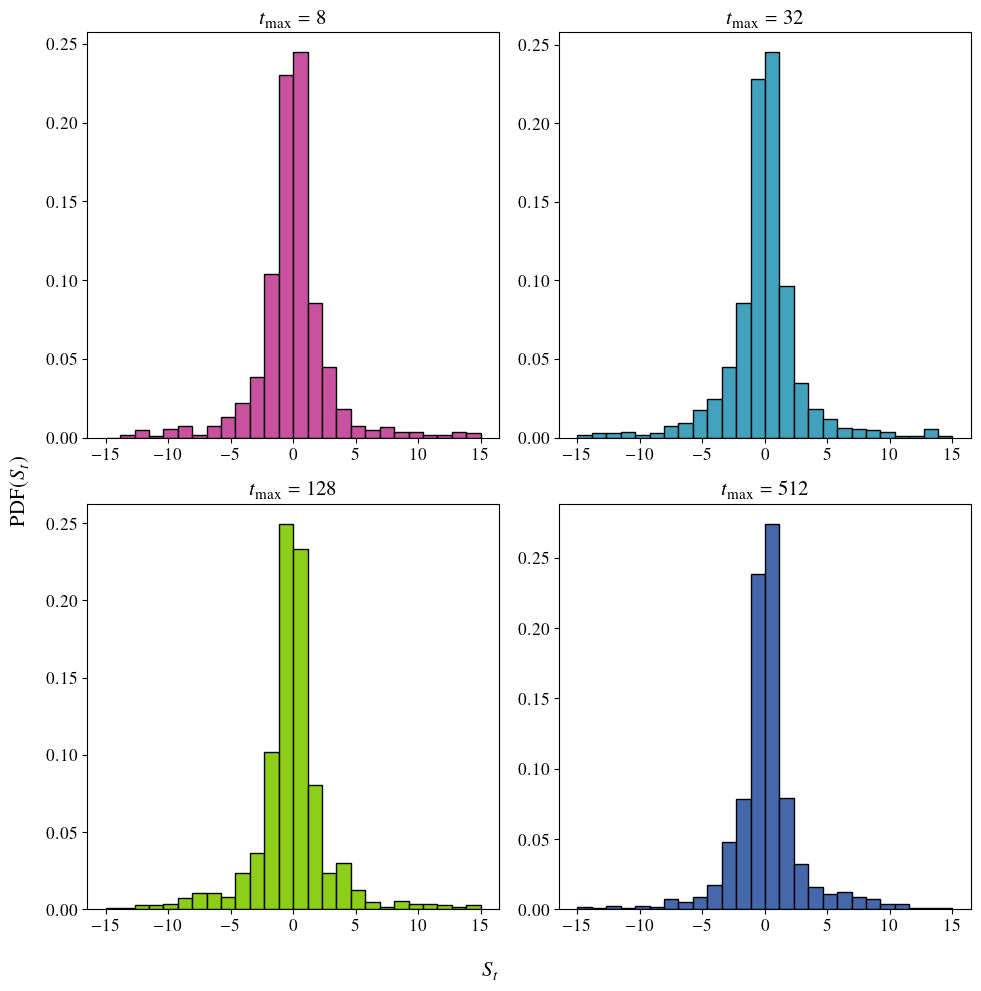

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
cycle = plt.rcParams["axes.prop_cycle"]
colors = cycle.by_key()["color"]
for index, t, color in zip([(0, 0), (0, 1), (1, 0), (1, 1)], [8, 32, 128, 512], colors[:4]):
    average = random_numbers[:, :t].mean(axis=1)
    ax[index].hist(average, bins=26, density=True, color=color, range=histogram_evolution_range)
    ax[index].set_title(f"$t_\\mathrm{{max}} = {t}$")

fig.supxlabel("$S_t$")
fig.supylabel(r"$\text{PDF}(S_t)$")
fig.tight_layout(rect=[0, 0, 1, 1])
fig.savefig(average_hist_evolution)

## Estimated Uncertainty

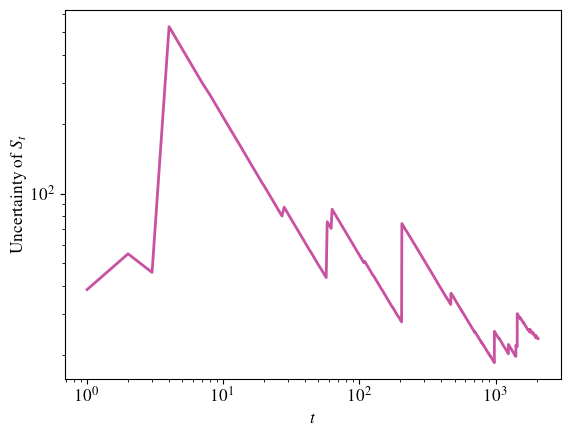

In [5]:
n = np.arange(1, T + 1, 1)
uncertainty = np.array([random_numbers[:, :j].mean(axis=1).std() for j in n])

plt.yscale("log")
plt.xscale("log")
plt.plot(n, uncertainty, lw=2)
plt.xlabel("$t$")
plt.ylabel("Uncertainty of $S_t$")
plt.savefig(average_uncertainty_evolution)